In [1]:
from harness import Harness
import pandas
from harness.src.ext import HarnessExtension

In [2]:
class NetworkXMixin:
    graph = None

class NetworkXExtension(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.src.ext.base.JinjaExtension',
    'harness.src.ext.SciKit.SciKitExtension', 
    'harness.src.ext.Bokeh.BokehModelsExtension',     
    'harness.src.ext.Bokeh.BokehPlottingExtension',
    'harness.src.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkXExtension'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

In [5]:
df.to_graph(source=0, target=1)

,0,1
0,0.262719,0.142424
1,1.906538,0.313548
2,-1.412924,0.083226
3,0.069884,0.808722
4,0.296638,-1.559842
5,-0.642406,-0.827045
6,-0.194634,-0.956885
7,0.287513,-1.518930
8,0.442937,2.182230
9,1.599429,-0.651656


In [6]:
df.to_graph(0, 1).edges()

[(0.26271864492473435, 0.14242411441040642),
 (2.1822297749720079, 0.44293657384872798),
 (-0.6424058544791782, -0.82704452948463369),
 (1.9065375167420866, 0.31354805421821214),
 (-0.6516563008313746, 1.5994293071048624),
 (0.069883829740258335, 0.80872234641815044),
 (0.083226321722203067, -1.4129238720161235),
 (-1.5189297211588804, 0.28751288146415188),
 (-0.1946337038779988, -0.9568854314221783),
 (0.29663812411864177, -1.5598419499281788)]

In [7]:
df.edges()

[(0.26271864492473435, 0.14242411441040642),
 (2.1822297749720079, 0.44293657384872798),
 (-0.6424058544791782, -0.82704452948463369),
 (1.9065375167420866, 0.31354805421821214),
 (-0.6516563008313746, 1.5994293071048624),
 (0.069883829740258335, 0.80872234641815044),
 (0.083226321722203067, -1.4129238720161235),
 (-1.5189297211588804, 0.28751288146415188),
 (-0.1946337038779988, -0.9568854314221783),
 (0.29663812411864177, -1.5598419499281788)]

In [8]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
-0.642406,0.373152,0.990995
-1.559842,0.273079,0.058690


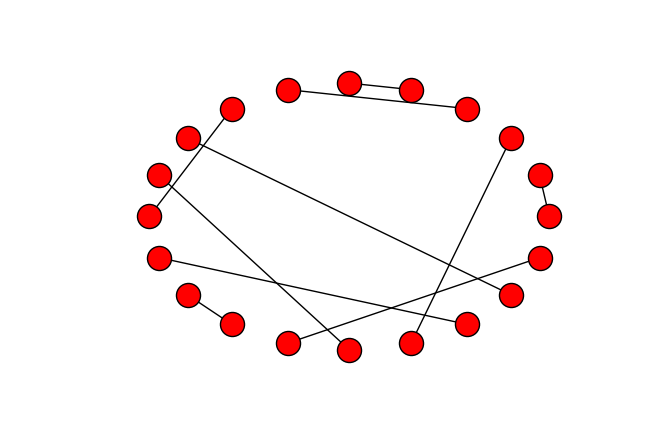

In [9]:
%matplotlib inline
df.draw_circular()